### Importation des libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Importation de données

In [8]:
data_path = r'E:\Documents\1. MyOffice\1. Private\7. Plan de developpement Personnel\3. Masters Et Certification\ISIG\06. Data Mining et Machine Learning\datasets\Global Missing Migrants Dataset.csv'
data = pd.read_csv(data_path)
df = data.copy()

In [10]:
df.head(3)

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America
2,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America


### Exploration des donnees

##### <i>la taille de la bd</i>

In [14]:
print(df.shape) # la taille de la bd ( lignes et colonnes)
print(df.size) # le nombre d'elements de la bd
print()

(13020, 19)
247380



##### <i>liste des variables / colonnes de la bd et type des variables </i>

In [17]:
print(df.dtypes)
print()

Incident Type                           object
Incident year                            int64
Reported Month                          object
Region of Origin                        object
Region of Incident                      object
Country of Origin                       object
Number of Dead                         float64
Minimum Estimated Number of Missing      int64
Total Number of Dead and Missing         int64
Number of Survivors                      int64
Number of Females                        int64
Number of Males                          int64
Number of Children                       int64
Cause of Death                          object
Migration route                         object
Location of death                       object
Information Source                      object
Coordinates                             object
UNSD Geographical Grouping              object
dtype: object



### Valuers Manquantes

##### <i>les nombres des valeurs manquantes pour chaque colonnes </i>

In [21]:
print(df.isna().sum())
print()

Incident Type                             0
Incident year                             0
Reported Month                            0
Region of Origin                         22
Region of Incident                        0
Country of Origin                         8
Number of Dead                          550
Minimum Estimated Number of Missing       0
Total Number of Dead and Missing          0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Migration route                        3021
Location of death                         0
Information Source                        8
Coordinates                              36
UNSD Geographical Grouping                1
dtype: int64



##### <i>les nombres des valeurs manquantes pour chaque colonnes en ( % ) </i>

In [24]:
print(df.isna().mean()*100)
print()

Incident Type                           0.000000
Incident year                           0.000000
Reported Month                          0.000000
Region of Origin                        0.168971
Region of Incident                      0.000000
Country of Origin                       0.061444
Number of Dead                          4.224270
Minimum Estimated Number of Missing     0.000000
Total Number of Dead and Missing        0.000000
Number of Survivors                     0.000000
Number of Females                       0.000000
Number of Males                         0.000000
Number of Children                      0.000000
Cause of Death                          0.000000
Migration route                        23.202765
Location of death                       0.000000
Information Source                      0.061444
Coordinates                             0.276498
UNSD Geographical Grouping              0.007680
dtype: float64



In [26]:
df.isna().all() # les colonnes entièrement vide

Incident Type                          False
Incident year                          False
Reported Month                         False
Region of Origin                       False
Region of Incident                     False
Country of Origin                      False
Number of Dead                         False
Minimum Estimated Number of Missing    False
Total Number of Dead and Missing       False
Number of Survivors                    False
Number of Females                      False
Number of Males                        False
Number of Children                     False
Cause of Death                         False
Migration route                        False
Location of death                      False
Information Source                     False
Coordinates                            False
UNSD Geographical Grouping             False
dtype: bool

In [28]:
df.isna().all(axis = 1) # les lignes entièrement vide

0        False
1        False
2        False
3        False
4        False
         ...  
13015    False
13016    False
13017    False
13018    False
13019    False
Length: 13020, dtype: bool

### ANALYSES STATS

In [31]:
#type d'incidents
df['Incident Type'].value_counts()

Incident Type
Incident                   12670
Split Incident               261
Cumulative Incident           84
Incident,Split Incident        5
Name: count, dtype: int64

In [33]:
# Total incidents par pays d'origne
df['Region of Incident'].value_counts()

Region of Incident
North America         2706
Mediterranean         2055
Northern Africa       2014
Southern Asia         1673
Central America       1375
Western Africa         967
Europe                 619
Eastern Africa         489
Western Asia           414
South-eastern Asia     237
South America          209
Caribbean              160
Middle Africa           75
Southern Africa         16
Eastern Asia            10
Central Asia             1
Name: count, dtype: int64

In [35]:
#le nbre total des decés
deces = df['Number of Dead'].sum()
deces

32718.0

In [37]:
# le bbre total des survivants
survivant = df['Number of Survivors'].sum()
survivant

85330

In [39]:
# le total des Pers disparues
disparues = df['Minimum Estimated Number of Missing'].sum()
disparues

24795

In [41]:
total_migrant = deces + survivant + disparues
total_migrant

142843.0

### VISUALISATION

Text(0, 0.5, 'Région')

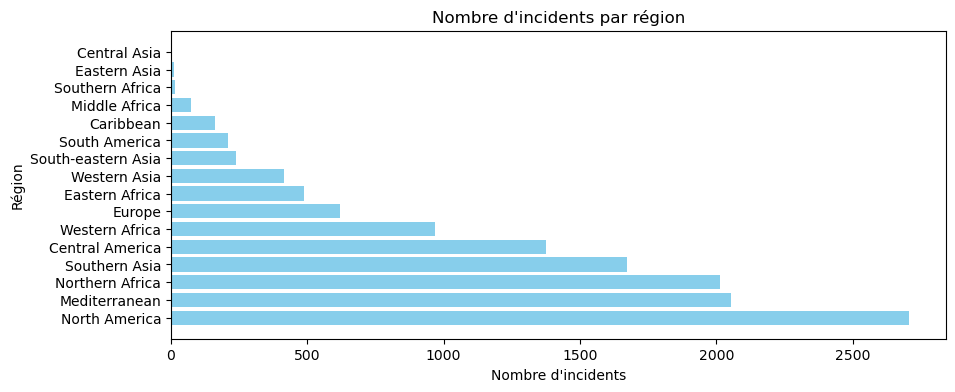

In [44]:
incident_by_region = df['Region of Incident'].value_counts()
x = incident_by_region.index.tolist()
y = incident_by_region.values.tolist()


fig, ax = plt.subplots(figsize=(10, 4))

ax.barh(x, y, color='skyblue')


ax.set_title("Nombre d'incidents par région")
ax.set_xlabel("Nombre d'incidents")
ax.set_ylabel("Région")

### deces par region

In [47]:
deces_by_region = df[['Region of Incident','Number of Dead']].groupby('Region of Incident')['Number of Dead'].sum()
deces_by_region = deces_by_region.sort_values()

In [49]:
x = deces_by_region.index.tolist()
y = deces_by_region.values.tolist()

<BarContainer object of 16 artists>

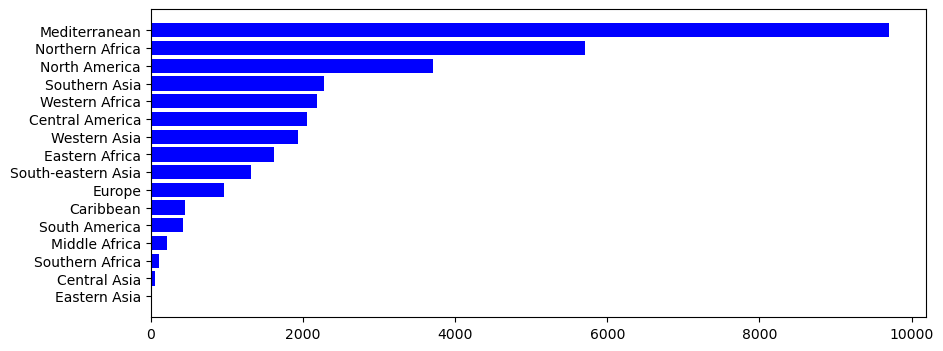

In [51]:
fig, ax = plt.subplots(figsize =(10,4))
ax.barh(x,y, color = 'b')